## Practical Work 1

For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

#### Import numpy, matplotlib.pyplot and any library you will need

In [229]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Read RegData csv file into numpy array 

In [230]:
pd.read_csv('RegData.csv',header=None).head()

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [231]:
data = np.genfromtxt('RegData.csv',delimiter=',')

In [232]:
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

In [233]:
m = len(data)

#### Define variables X and y. 
#### Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [234]:
X = data[:,0]
y = data[:,1]

#### Explore your data

In [235]:
X

array([2.9000001 , 6.69999981, 4.9000001 , 7.9000001 , 9.80000019,
       6.9000001 , 6.0999999 , 6.19999981, 6.        , 5.0999999 ,
       4.69999981, 4.4000001 , 5.80000019])

In [236]:
y

array([4.        , 7.4000001 , 5.        , 7.19999981, 7.9000001 ,
       6.0999999 , 6.        , 5.80000019, 5.19999981, 4.19999981,
       4.        , 4.4000001 , 5.19999981])

#### Plot the original data (scatter plot of X,y)

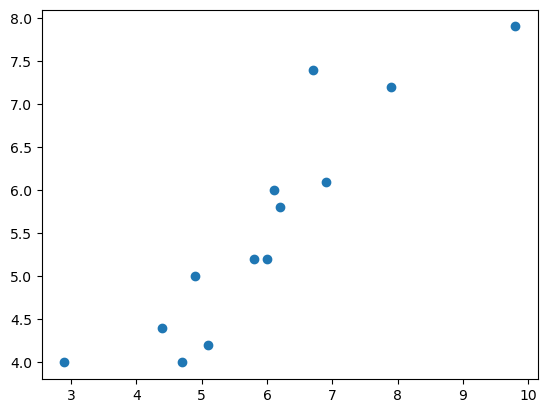

In [237]:
plt.scatter(X,y);

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate.

In [240]:
theta_0 , theta_1 ,alpha= 0, 0, 0.0001

### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.

In [241]:
# h_theta = []
# for i in range(m):
#     h = theta_0+theta_1*X[i]
#     h_theta.append(h)
h_theta = theta_0+theta_1*X


In [242]:
h_theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Step3: Calculate the MSE Cost function 𝑱(theta_0,theta_1 ).
<b>Note:</b> You better use either dot product or norm square of the error vector.

In [243]:
error = (h_theta-y)
j = np.linalg.norm(error)**2/(2*m)
print('Error Vec:',error)
print('\nJ = ',j)

Error Vec: [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

J =  16.305384479692314


### Step4: Calculate the gradient components for theta_0 and theta_1.
<b>Note:</b> You can use the error vector calculated in the previous step.

In [244]:
d_theta_0 = error.sum()/m
d_theta_1 = (error*X).sum()/m

print('d_theta_0 : ',d_theta_0)
print('d_theta_1 : ',d_theta_1)

d_theta_0 :  -5.56923073976923
d_theta_1 :  -35.043846043215375


### Step5: Update the parameters (simultaneously).

In [245]:
theta_0_new = theta_0 - (alpha*d_theta_0)
theta_1_new = theta_1 - (alpha*d_theta_1)

print('theta_0_new : ',theta_0_new)
print('theta_1_new : ',theta_1_new)

theta_0_new :  0.0005569230739769231
theta_1_new :  0.003504384604321538


### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
#### The objective from this step is to combine all the previous steps and iterate untill you either achieve the maximum number of iterations or reach the minimum.

In [242]:
# max_itra = 10000
# theta_0 , theta_1 ,alpha= 0, 0, 0.01
# J = []

# for it in range(max_itra):
#     h_theta = []
#     for i in range(m):
#         h = theta_0+theta_1*X[i]
#         h_theta.append(h)

#     error = (h_theta-y)
#     j = np.linalg.norm(error**2,1)/(2*m)
#     J.append(j)

#     d_theta_0 = error.sum()/m
#     d_theta_1 = (error*X).sum()/m

#     theta_0 = theta_0 - (alpha*d_theta_0)
#     theta_1 = theta_1 - (alpha*d_theta_1)
#     if it in range(0,10000,1000):
#         print('************************** itration ',it,'*************************')
#         print('h(x)\n',h_theta)
#         print('Error Vec:\n',error)
#         print('\nJ = ',j)
#         print('d_theta_0 : ',d_theta_0)
#         print('d_theta_1 : ',d_theta_1)
#         print('theta_0 : ',theta_0)
#         print('theta_1 : ',theta_1)

#     if(np.abs(d_theta_0) or np.abs(d_theta_1))<0.001:
#         print('this is the last iteration ',it,' with the d_theta_0 : ',d_theta_0,' and d_theta_1 : ',d_theta_1)
#         break

In [249]:
def LinearReg(X,y,alpha,max_itration,verbose=1):
    max_itra = max_itration
    theta_0 , theta_1 ,alpha= 0, 0, alpha
    J = []
    for it in range(max_itra):
        h_theta = theta_0+theta_1*X

        error = (h_theta-y)
        j = np.linalg.norm(error)**2/(2*m)
        J.append(j)            

        d_theta_0 = error.sum()/m
        d_theta_1 = (error*X).sum()/m
        grad_vec = np.array([[d_theta_0],[d_theta_1]])
        
        if(np.linalg.norm(grad_vec,2))<0.03:
            print('this is the last iteration ',it,' with the theta_0 : ',theta_0,' and theta_1 : ',theta_1)
            break
    

        theta_0 = theta_0 - (alpha*d_theta_0)
        theta_1 = theta_1 - (alpha*d_theta_1)
        
        if it in range(0,10000,verbose):
            print('\n************************** itration ',it,'*************************\n')
            print('h(x)\n',h_theta)
            print('Error Vec:\n',error)
            print('\nJ = ',j)
            print('d_theta_0 : ',d_theta_0)
            print('d_theta_1 : ',d_theta_1)
            print('Norm Gradient',np.linalg.norm(grad_vec,2))
            print('theta_0 : ',theta_0)
            print('theta_1 : ',theta_1)

    return theta_0,theta_1,J

In [250]:
theta_0,theta_1,J = LinearReg(X,y,0.01,2000,verbose=500)


************************** itration  0 *************************

h(x)
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Error Vec:
 [-4.         -7.4000001  -5.         -7.19999981 -7.9000001  -6.0999999
 -6.         -5.80000019 -5.19999981 -4.19999981 -4.         -4.4000001
 -5.19999981]

J =  16.305384479692314
d_theta_0 :  -5.56923073976923
d_theta_1 :  -35.043846043215375
Norm Gradient 35.483622652336
theta_0 :  0.0556923073976923
theta_1 :  0.35043846043215376

************************** itration  500 *************************

h(x)
 [2.94837758 6.13058818 4.62322539 7.13549711 8.72660261 6.2980732
 5.62813392 5.71187623 5.54439161 4.79071001 4.45574037 4.20451344
 5.37690699]
Error Vec:
 [-1.05162242 -1.26941191 -0.37677461 -0.0645027   0.82660252  0.1980733
 -0.37186608 -0.08812396  0.3443918   0.5907102   0.45574037 -0.19548666
  0.17690718]

J =  0.17218252769220857
d_theta_0 :  -0.06348945978776051
d_theta_1 :  0.00992308790960848
Norm Gradient 0.06426024570294979
theta_0 :  0.5204

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [251]:
y_predict = theta_0+theta_1*X

In [252]:
print('h(x) = y_predict:\n',y_predict,'\ny_actual:\n',y)

h(x) = y_predict:
 [3.21495471 6.10758612 4.73739241 7.02104896 8.46736485 6.25983011
 5.65085489 5.7269767  5.57473307 4.88963603 4.58514842 4.35678298
 5.42248945] 
y_actual:
 [4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

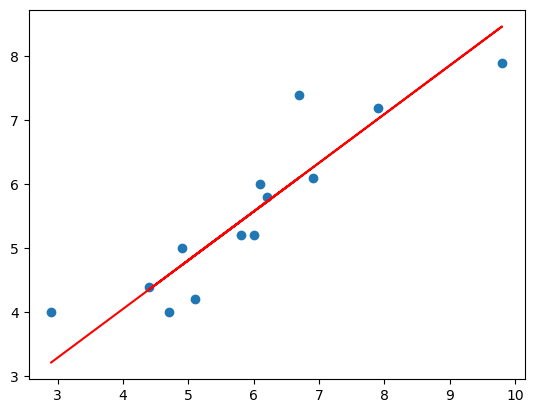

In [253]:
plt.scatter(X,y);
plt.plot(X,y_predict,color='r');

#### Use R2 score to evaluate LR equation output
https://en.wikipedia.org/wiki/Coefficient_of_determination

In [254]:
from sklearn.metrics import r2_score
r2_score(y,y_predict)

0.8131924034847119

## Plot loss function
### Repeat your implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

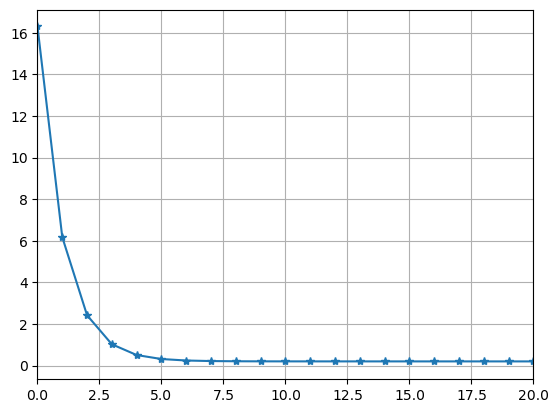

In [255]:
plt.plot(J,'-*')
plt.xlim(0,20)
plt.grid()

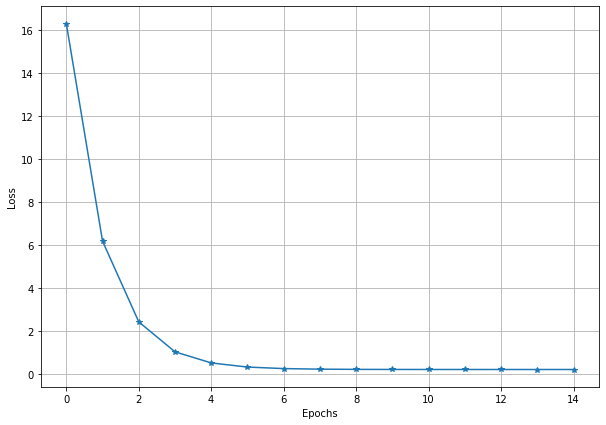

## Multivariate LR

#### Read MultiVarLR csv file into numpy array.
#### The first three columns are x1,x2, and x3.
#### The last column is the target label y.

In [256]:
data2 = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [257]:
m2 = len(data2)

In [258]:
data2

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [259]:
X2 = data2[:,:3]
y2 = data2[:,-1]

In [260]:
X2 = np.c_[np.ones(len(X2)),X2]
X2

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [265]:
y2

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [270]:
y2=y2.reshape(-1,1)

### Generalize your implementation to work for MultiVariables
#### Vectorize your implementation.
<b>Notes:</b> 
- You need to add column that contains ones to the data. This column represent x feature for theta_0.
- Use learninig rate = 0.0001.

In [1]:
def LinearRegMulti(X,y,alpha,max_itration,verbose=1):
    max_itra = max_itration
    theta =  np.zeros((4,1))
    alpha = alpha
    J = []
    for i in range(max_itra):
        h_theta = X@theta

        error = (h_theta-y)
        j = (error.T@error/(2*m2))[0,0]
        J.append(j)
        
        d_theta = (X.T@error)/m2
        grad_vec_norm = np.linalg.norm(d_theta,2)

        if grad_vec_norm<0.01:
            print('this is the last iteration ',i,' with the theta_0 : ',theta_0,' and theta_1 : ',theta_1)
            break
        theta = theta - (alpha)*(d_theta)


        if i in range(0,10000,verbose):
            print('\n************************** itration ',i,'*************************\n')
            print('h(x)\n',h_theta)
            print('Error Vec:\n',error)
            print('\nJ = ',j)
            print('d_theta : ',d_theta)
            print('Norm Gradient',grad_vec_norm)


        
    return theta,J

In [2]:
theta2 , J2 = LinearRegMulti(X2,y2,0.0001,10000,2000)

NameError: name 'X2' is not defined

#### Predict y values using the LR equation
##### X@thetas

In [275]:
y2_predict = X2@theta2
print('h(x) = y2_predict:\n',y2_predict)

h(x) = y2_predict:
 [[152.94020804]
 [184.6036251 ]
 [181.38810377]
 [198.87124074]
 [139.87384042]
 [105.22708012]
 [150.58846767]
 [114.03534969]
 [174.30956713]
 [164.4312807 ]
 [143.95531374]
 [142.78630359]
 [186.06197336]
 [152.82063463]
 [151.5416465 ]
 [188.51739606]
 [144.17320738]
 [181.39290148]
 [177.05170123]
 [158.56725647]
 [176.24347363]
 [174.41748279]
 [167.58918635]
 [151.08883937]
 [190.57979833]]


### Plot loss vs. iterations

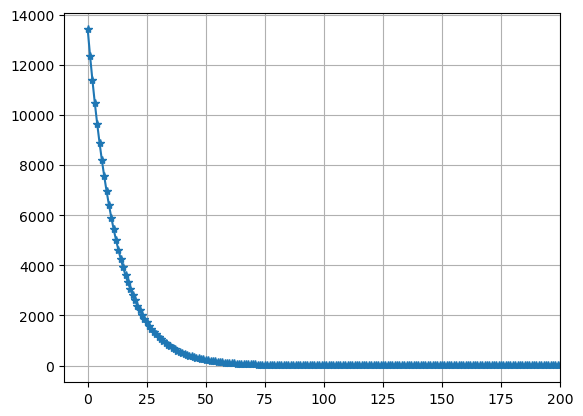

In [276]:
plt.plot(J2,'-*')
plt.xlim(-10,200)
plt.grid()

#### Use R2 score to evaluate LR equation output

In [277]:
r2_score(y2,y2_predict)

0.9890295591200727